## Introduction: Business Goal & Problem Definition

The goal of this project is to study and predict the right group of new customers for an automotive company, so the company can adopt the specific proven marketing strategy to each of them and be more succesful in the business.

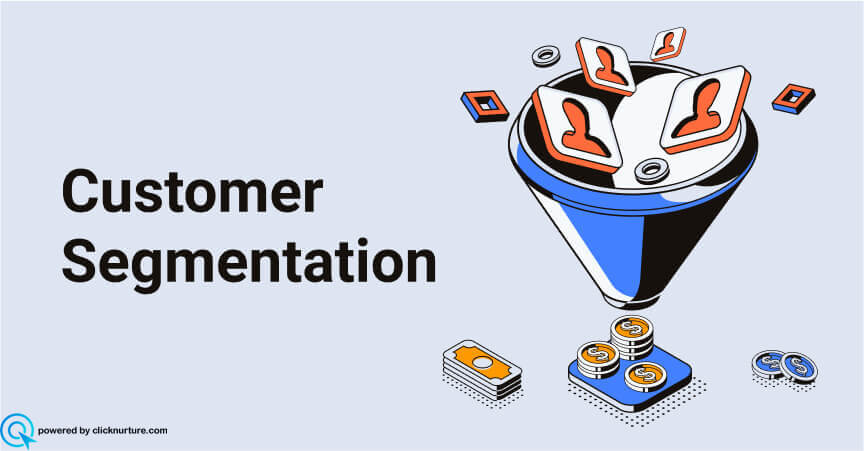

For that we use the Customer Segmentation Classification Dataset available in Kaggle, here is the columns in our data:
* **ID**-Unique ID

* **Gender**-Gender of the customer

* **Ever_Married**-Marital status of the customer

* **Age**-Age of the customer

* **Graduated**-Is the customer a graduate?

* **Profession**-Profession of the customer

* **Work_Experience**-Work Experience in years

* **Spending_Score**-Spending score of the customer

* **Family_Size**-Number of family members for the customer (including the customer)

* **Var_1**-Anonymised Category for the customer

* **Segmentation**-(target) Customer Segment of the customer

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-segmentation/Train.csv
/kaggle/input/customer-segmentation/Test.csv


## 1. Reading Dataset

In [2]:
train_data = pd.read_csv('/kaggle/input/customer-segmentation/Train.csv')
test_data = pd.read_csv('/kaggle/input/customer-segmentation/Test.csv')
data = pd.concat([train_data,test_data])
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10695 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.7+ KB


In [4]:
data.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [5]:
data.duplicated().sum()

38

**Observations:**
* Having missing values
* Having duplicated values
* Columns with numerical values are of object type

In [6]:
data.describe()

,ID,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,9597.000000,10247.000000
mean,463468.088640,43.511828,2.619777,2.844052
std,2600.966411,16.774158,3.390790,1.536427
min,458982.000000,18.000000,0.000000,1.000000
25%,461220.500000,30.000000,0.000000,2.000000
50%,463451.000000,41.000000,1.000000,3.000000
75%,465733.500000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [7]:
data.describe(include='object')

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,10695,10505,10593,10533,10695,10587,10695
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,5841,6163,6570,3318,6494,6910,3027


In [8]:
categorical_col = data.select_dtypes('object')

for i in categorical_col:
    print(data[i].value_counts(), end="\n\n")

Male      5841
Female    4854
Name: Gender, dtype: int64

Yes    6163
No     4342
Name: Ever_Married, dtype: int64

Yes    6570
No     4023
Name: Graduated, dtype: int64

Artist           3318
Healthcare       1750
Entertainment    1250
Engineer          935
Doctor            930
Lawyer            844
Executive         775
Marketing         403
Homemaker         328
Name: Profession, dtype: int64

Low        6494
Average    2599
High       1602
Name: Spending_Score, dtype: int64

Cat_6    6910
Cat_4    1475
Cat_3    1089
Cat_2     563
Cat_7     269
Cat_1     167
Cat_5     114
Name: Var_1, dtype: int64

D    3027
A    2818
C    2442
B    2408
Name: Segmentation, dtype: int64



## 2. Data Cleaning

### (A)Remove duplicated rows

In [9]:
data.drop_duplicates(inplace=True)

### (B)Handling Missing Values

**Numerical features**
* Family_Size: median
* Work_Experience: median

**Category features**
* Ever_Married: consider missing values as No
* Graduated: consider missing values as No
* Profession: delete
* Var_1: delete

Median value of Work experience feature is: 1.0


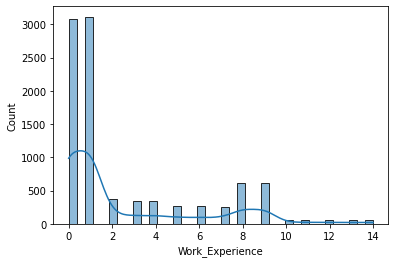

In [10]:
sns.histplot(data['Work_Experience'],kde=True)
print("Median value of Work experience feature is:",data['Work_Experience'].median())

Median value of Family size feature is: 2.0


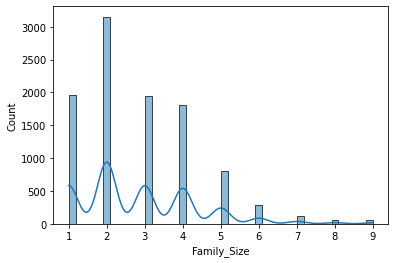

In [11]:
sns.histplot(data['Family_Size'],kde=True)
print("Median value of Family size feature is:",data['Family_Size'].median())

When the distribution is skewed, using **median values** to replace the missing values

In [12]:
data['Work_Experience'] = data['Work_Experience'].fillna(data['Work_Experience'].median())
data['Family_Size'] = data['Family_Size'].fillna(data['Family_Size'].median())

In [13]:
data['Ever_Married'].fillna('No',inplace=True)
data['Graduated'].fillna('No',inplace=True)
data.dropna(subset=['Profession'],inplace=True)
data.dropna(subset=['Var_1'],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10390 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10390 non-null  int64  
 1   Gender           10390 non-null  object 
 2   Ever_Married     10390 non-null  object 
 3   Age              10390 non-null  int64  
 4   Graduated        10390 non-null  object 
 5   Profession       10390 non-null  object 
 6   Work_Experience  10390 non-null  float64
 7   Spending_Score   10390 non-null  object 
 8   Family_Size      10390 non-null  float64
 9   Var_1            10390 non-null  object 
 10  Segmentation     10390 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 974.1+ KB


### (C)Drop Unnecessary column

In [14]:
data = data.drop('ID',axis=1)

## 3. Exploratory Data Analysis

### (A)Visualization for Categorical Variables

<AxesSubplot:title={'center':'Segmentation Count'}, xlabel='Segmentation', ylabel='count'>

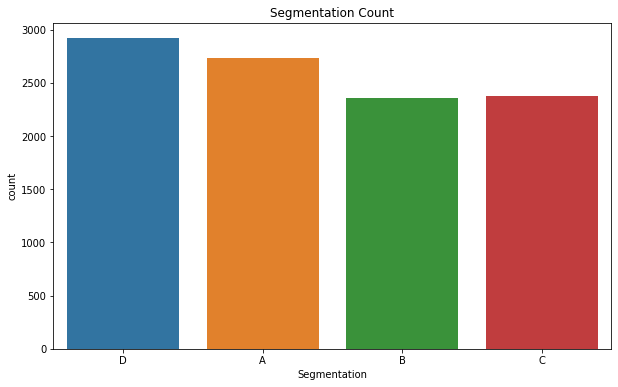

In [15]:
plt.figure(figsize=(10,6))
plt.title('Segmentation Count')
sns.countplot(x=data.Segmentation)

<AxesSubplot:title={'center':'Gender Count color by segmentation'}, xlabel='Gender', ylabel='count'>

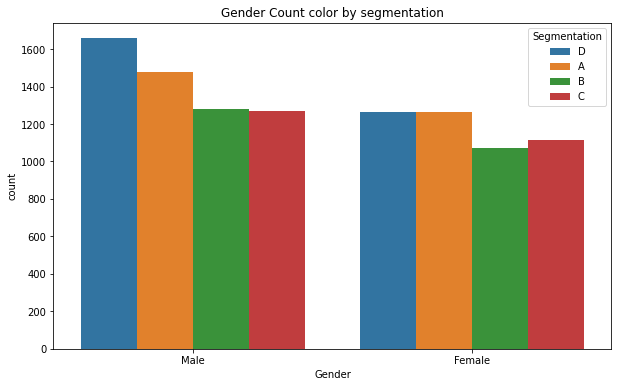

In [16]:
plt.figure(figsize=(10,6))
plt.title('Gender Count color by segmentation')
sns.countplot(data=data,x='Gender',hue='Segmentation')

<AxesSubplot:title={'center':'Married Count color by segmentation'}, xlabel='Ever_Married', ylabel='count'>

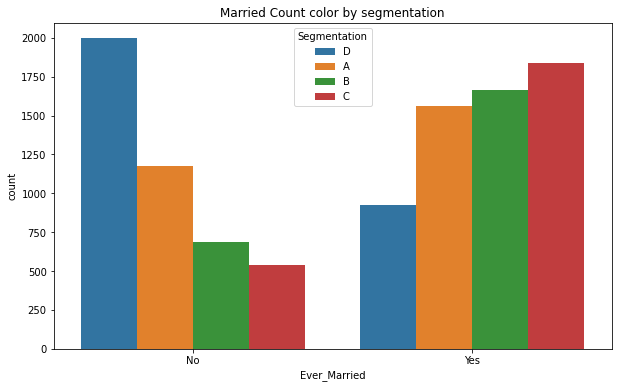

In [17]:
plt.figure(figsize=(10,6))
plt.title('Married Count color by segmentation')
sns.countplot(data=data,x='Ever_Married',hue='Segmentation')

<AxesSubplot:title={'center':'Graduated Count color by segmentation'}, xlabel='Graduated', ylabel='count'>

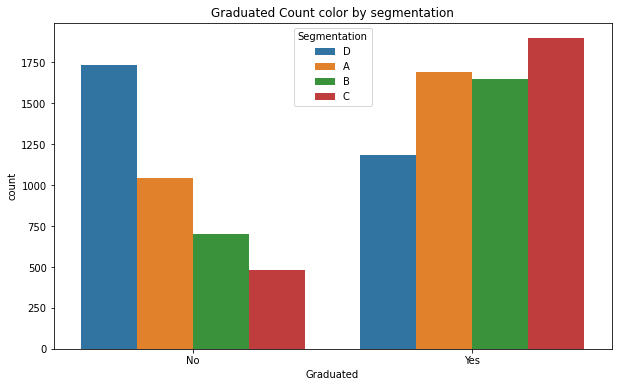

In [18]:
plt.figure(figsize=(10,6))
plt.title('Graduated Count color by segmentation')
sns.countplot(data=data,x='Graduated',hue='Segmentation')

<AxesSubplot:title={'center':'Profession Count color by segmentation'}, xlabel='Profession', ylabel='count'>

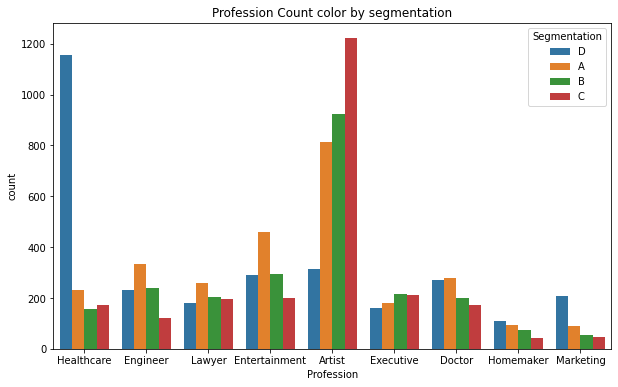

In [19]:
plt.figure(figsize=(10,6))
plt.title('Profession Count color by segmentation')
sns.countplot(data=data,x='Profession',hue='Segmentation')

<AxesSubplot:title={'center':'Spending Score Count color by segmentation'}, xlabel='Spending_Score', ylabel='count'>

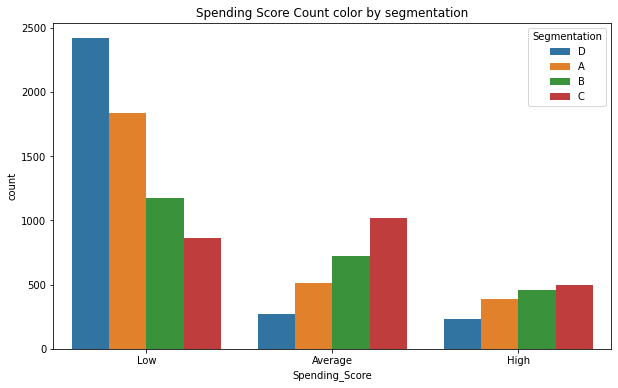

In [20]:
plt.figure(figsize=(10,6))
plt.title('Spending Score Count color by segmentation')
sns.countplot(data=data,x='Spending_Score',hue='Segmentation')

<AxesSubplot:title={'center':'Anonymised Category Count color by segmentation'}, xlabel='Var_1', ylabel='count'>

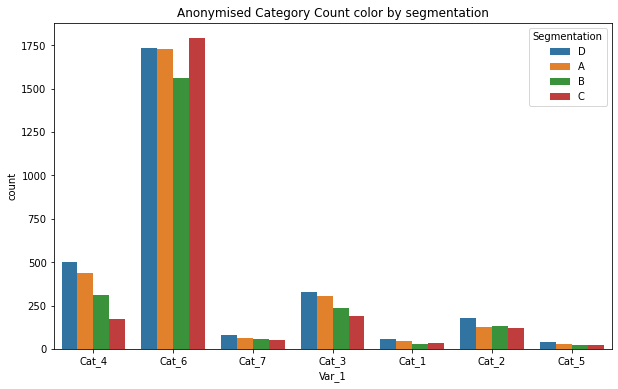

In [21]:
plt.figure(figsize=(10,6))
plt.title('Anonymised Category Count color by segmentation')
sns.countplot(data=data,x='Var_1',hue='Segmentation')

### (B)Visualization for Numerical Variables

<AxesSubplot:title={'center':'Age histogram'}, xlabel='Age', ylabel='Count'>

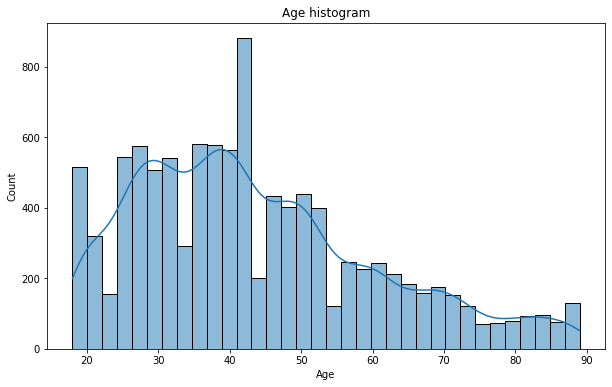

In [22]:
plt.figure(figsize=(10,6))
plt.title('Age histogram')
sns.histplot(data=data,x='Age',kde=True)

<Figure size 720x432 with 0 Axes>

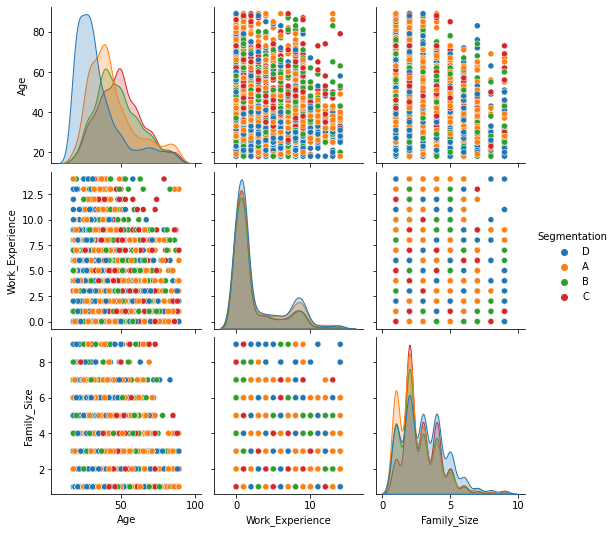

In [23]:
plt.figure(figsize=(10,6))
sns.pairplot(data,hue='Segmentation')

## 4. Feature Engineering

### (A)Converting Categorical Variables to Numeric

In [24]:
genders = {'Male':0,'Female':1}
data['Gender'] = data['Gender'].map(genders)

married = {'No':0,'Yes':1}
data['Ever_Married'] = data['Ever_Married'].map(married)

graduate = {'No':0,'Yes':1}
data['Graduated'] = data['Graduated'].map(graduate)

spending_score = {'Low':0,'Average':1,'High':2}
data['Spending_Score'] = data['Spending_Score'].map(spending_score)

var_score = {'Cat_1':1,'Cat_2':2,'Cat_3':3,'Cat_4':4,'Cat_5':5,'Cat_6':6,'Cat_7':7}
data['Var_1'] = data['Var_1'].map(var_score)

rank = {'A':0,'B':1,'C':2,'D':3}
data['Segmentation'] = data['Segmentation'].map(rank)

data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0,22,0,Healthcare,1.0,0,4.0,4,3
1,1,1,38,1,Engineer,1.0,1,3.0,4,0
2,1,1,67,1,Engineer,1.0,0,1.0,6,1
3,0,1,67,1,Lawyer,0.0,2,2.0,6,1
4,1,1,40,1,Entertainment,1.0,2,6.0,6,0


### (B)Dummy Variable Encoding

In [25]:
print(data['Profession'].value_counts())

Artist           3273
Healthcare       1717
Entertainment    1241
Engineer          925
Doctor            919
Lawyer            834
Executive         764
Marketing         398
Homemaker         319
Name: Profession, dtype: int64


In [26]:
data = pd.get_dummies(data)
data.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,0,0,22,0,1.0,0,4.0,4,3,0,0,0,0,0,1,0,0,0
1,1,1,38,1,1.0,1,3.0,4,0,0,0,1,0,0,0,0,0,0
2,1,1,67,1,1.0,0,1.0,6,1,0,0,1,0,0,0,0,0,0
3,0,1,67,1,0.0,2,2.0,6,1,0,0,0,0,0,0,0,1,0
4,1,1,40,1,1.0,2,6.0,6,0,0,0,0,1,0,0,0,0,0


## 5. Building Model

### Split train test data

In [27]:
from sklearn.model_selection import train_test_split

features = data.drop(columns=['Segmentation'],axis=1)
target = data['Segmentation']
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=0)

### Baseline Model Training

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [29]:
models = {'LogisticRegression': LogisticRegression(max_iter=10000),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'SVC': SVC(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'GradientBoostingClassifier': GradientBoostingClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(),
          'XGBClassifier': XGBClassifier()}

In [30]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(0)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)

    model_scores = pd.DataFrame(model_scores,index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')
    
    
    return model_scores

In [31]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:42:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [32]:
cm = sns.color_palette('PuBuGn',as_cmap=True)
score = model_scores.style.background_gradient(cmap=cm)
score

,Score
DecisionTreeClassifier,0.364293
KNeighborsClassifier,0.407122
SVC,0.422040
RandomForestClassifier,0.423484
XGBClassifier,0.464870
LogisticRegression,0.470645
AdaBoostClassifier,0.477382
GradientBoostingClassifier,0.487488


We will now based **AdaBoostClassifier** and **GradientBoostingClassifier** on the CV on the f1 scores

### HyperTuning by Random search CV

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

def randomsearch_cv_scores(models, params, X_train, X_test, y_train, y_test):
    np.random.seed(0)
    
    model_rs_scores = {}
    model_rs_best_param = {}
    
    for name, model in models.items():
        rs_model = RandomizedSearchCV(model,
                                      param_distributions=params[name],
                                      cv=5,
                                      n_iter=20,n_jobs=-1,
                                      verbose=2)        
        rs_model.fit(X_train,y_train)
        model_rs_scores[name] = rs_model.score(X_test,y_test)
        model_rs_best_param[name] = rs_model.best_params_
        
    return model_rs_scores, model_rs_best_param

In [34]:
models = {'AdaBoostClassifier': AdaBoostClassifier(),
          'GradientBoostingClassifier': GradientBoostingClassifier()
         }

params = {'AdaBoostClassifier': {'n_estimators': [20,50,100,200,400],
                                'learning_rate': [0.001,0.01,0.1,1.0],
                                'algorithm': ['SAMME','SAMME.R']},
          'GradientBoostingClassifier' : {'loss': ['deviance', 'exponential'],
                                          'learning_rate': [0.001,0.01,0.1,1.0],
                                          'n_estimators': [20,50,100,200,400],
                                          'criterion': ['friedman_mse', 'mse'],
                                          'max_depth' : [2,3,6,10,20],
                                          'ccp_alpha' : [0.0,0.001,0.01,0.1,1]
                                          }
         }

In [35]:
model_rs_scores,model_rs_best_param = randomsearch_cv_scores(models,params,X_train,X_test,y_train,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   35.8s finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.4min finished


In [36]:
model_rs_scores = pd.DataFrame(model_rs_scores,index=['Score']).transpose()
model_rs_scores.sort_values('Score')

,Score
GradientBoostingClassifier,0.473051
AdaBoostClassifier,0.482676


In [37]:
model_rs_best_param

{'AdaBoostClassifier': {'n_estimators': 400,
  'learning_rate': 0.1,
  'algorithm': 'SAMME.R'},
 'GradientBoostingClassifier': {'n_estimators': 50,
  'max_depth': 3,
  'loss': 'deviance',
  'learning_rate': 0.01,
  'criterion': 'mse',
  'ccp_alpha': 0.0}}

## 6. Model Evalution

In [38]:
from sklearn.metrics import classification_report,plot_confusion_matrix 
from sklearn.model_selection import cross_val_score

### AdaBoostClassifier

In [39]:
ada = AdaBoostClassifier(n_estimators=400,learning_rate=0.1,algorithm='SAMME.R')
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.41      0.51      0.45       546
           1       0.37      0.21      0.27       460
           2       0.50      0.54      0.52       487
           3       0.61      0.62      0.61       585

    accuracy                           0.48      2078
   macro avg       0.47      0.47      0.46      2078
weighted avg       0.48      0.48      0.47      2078



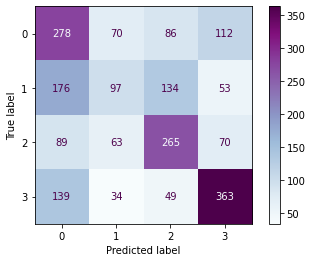

In [41]:
plot_confusion_matrix(ada,X_test,y_test,cmap='BuPu')

In [42]:
cv_accuracy = cross_val_score(ada,X_train,y_train,cv=5,scoring='accuracy')

In [43]:
print(f'Cross Validaion accuracy Scores: {cv_accuracy}')
print(f'Cross Validation accuracy Mean Score: {cv_accuracy.mean()}')

Cross Validaion accuracy Scores: [0.48466627 0.46903187 0.49277978 0.46871239 0.46209386]
Cross Validation accuracy Mean Score: 0.4754568353627078


### Feature Importance

In [44]:
feat_importance = ada.feature_importances_
feat_importance = pd.DataFrame(feat_importance,
                               columns=['Score'],
                               index=features.columns)

In [45]:
feat_importance.sort_values(by='Score',ascending=False).style.background_gradient(cmap=cm)

,Score
Age,0.362500
Var_1,0.135000
Family_Size,0.122500
Spending_Score,0.062500
Work_Experience,0.050000
Graduated,0.045000
Profession_Healthcare,0.037500
Profession_Marketing,0.035000
Profession_Entertainment,0.032500
Profession_Artist,0.030000


<AxesSubplot:title={'center':'Feature Importances'}, xlabel='Score'>

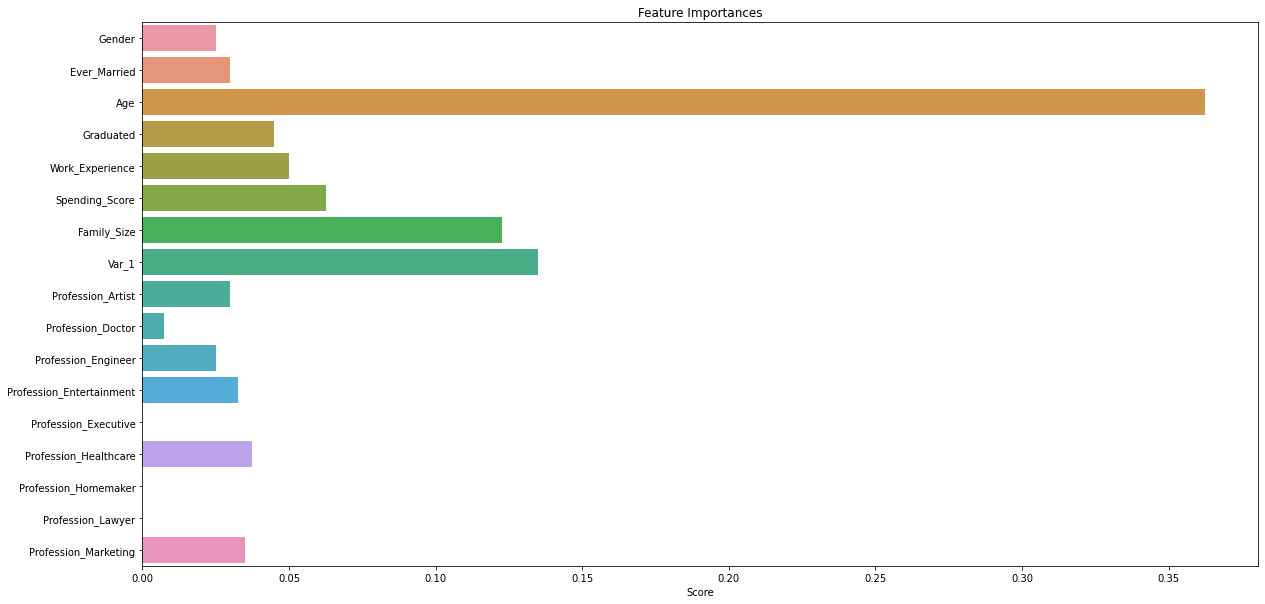

In [46]:
plt.figure(figsize=(20,10))
plt.title('Feature Importances')
sns.barplot(x=feat_importance.Score,y=feat_importance.index)

**Conclusion:**

The chosen model was AdaBoost since it´s the most accurate, although it has limitations and doesn’t present a high accuracy.Through the analysis of feature importance, we can assume that Age is the tje most important features of classification.